In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3070c0172a131b68ab37ad740fc0d11f


In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | tazovskiy
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | athabasca
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | atherton
Processing Record 7 of Set 1 | coahuayana
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | laguna
Processing Record 10 of Set 1 | panjab
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | gornyy
Processing Record 13 of Set 1 | pevek
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | okha
Processing Record 16 of Set 1 | oranjemund
Processing Record 17 of Set 1 | kahului
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | ambunti
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 | port keats
Processing Record 23 of Set 1 | ushuaia
Processing Record 

Processing Record 39 of Set 4 | san patricio
Processing Record 40 of Set 4 | san cristobal
Processing Record 41 of Set 4 | torbay
Processing Record 42 of Set 4 | bosanska dubica
Processing Record 43 of Set 4 | shieli
Processing Record 44 of Set 4 | ariquemes
Processing Record 45 of Set 4 | lagoa
Processing Record 46 of Set 4 | constantine
Processing Record 47 of Set 4 | aksarka
Processing Record 48 of Set 4 | harur
Processing Record 49 of Set 4 | thinadhoo
Processing Record 50 of Set 4 | xuanzhou
Processing Record 1 of Set 5 | owando
Processing Record 2 of Set 5 | brae
Processing Record 3 of Set 5 | port-cartier
Processing Record 4 of Set 5 | jujuy
City not found. Skipping...
Processing Record 5 of Set 5 | arcachon
Processing Record 6 of Set 5 | san julian
Processing Record 7 of Set 5 | nyborg
Processing Record 8 of Set 5 | longyearbyen
Processing Record 9 of Set 5 | narsaq
Processing Record 10 of Set 5 | mar del plata
Processing Record 11 of Set 5 | bengkulu
Processing Record 12 of Se

Processing Record 23 of Set 8 | tumaco
Processing Record 24 of Set 8 | houma
Processing Record 25 of Set 8 | sao joao da barra
Processing Record 26 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 27 of Set 8 | puri
Processing Record 28 of Set 8 | lagos
Processing Record 29 of Set 8 | nelson bay
Processing Record 30 of Set 8 | nzerekore
Processing Record 31 of Set 8 | bemidji
Processing Record 32 of Set 8 | yarim
Processing Record 33 of Set 8 | maniitsoq
Processing Record 34 of Set 8 | minbu
Processing Record 35 of Set 8 | kolvereid
Processing Record 36 of Set 8 | sakakah
Processing Record 37 of Set 8 | durango
Processing Record 38 of Set 8 | porto novo
Processing Record 39 of Set 8 | bereda
Processing Record 40 of Set 8 | gazimurskiy zavod
Processing Record 41 of Set 8 | hokitika
Processing Record 42 of Set 8 | tukums
Processing Record 43 of Set 8 | the valley
Processing Record 44 of Set 8 | ramganj
Processing Record 45 of Set 8 | kimparana
Processing Record 46 of Set 

Processing Record 13 of Set 12 | portland
Processing Record 14 of Set 12 | ilinskiy
Processing Record 15 of Set 12 | durban
Processing Record 16 of Set 12 | sabha
Processing Record 17 of Set 12 | ballarat
Processing Record 18 of Set 12 | viru
Processing Record 19 of Set 12 | farah
Processing Record 20 of Set 12 | antalaha
Processing Record 21 of Set 12 | riyadh
Processing Record 22 of Set 12 | la palma
Processing Record 23 of Set 12 | baturaja
Processing Record 24 of Set 12 | maxixe
Processing Record 25 of Set 12 | placido de castro
Processing Record 26 of Set 12 | kabwe
Processing Record 27 of Set 12 | zheleznogorsk
Processing Record 28 of Set 12 | newnan
Processing Record 29 of Set 12 | duz
City not found. Skipping...
Processing Record 30 of Set 12 | hrubieszow
Processing Record 31 of Set 12 | cayenne
Processing Record 32 of Set 12 | ust-kulom
Processing Record 33 of Set 12 | vao
Processing Record 34 of Set 12 | ilirska bistrica
Processing Record 35 of Set 12 | paucartambo
City not f

In [16]:
import pandas as pd
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.6167,-73.6500,47.62,85,58,4.61,CL,2022-09-13 02:48:21
1,Tazovskiy,67.4667,78.7000,35.96,98,100,5.97,RU,2022-09-13 02:48:22
2,Albany,42.6001,-73.9662,69.67,93,100,1.63,US,2022-09-13 02:44:07
3,Athabasca,54.7169,-113.2854,54.01,37,50,7.76,CA,2022-09-13 02:45:26
4,Hobart,-42.8794,147.3294,52.27,57,40,8.05,AU,2022-09-13 02:48:22
5,Atherton,53.5237,-2.4935,52.21,96,37,3.27,GB,2022-09-13 02:48:23
6,Coahuayana,18.7333,-103.6833,76.42,96,100,2.17,MX,2022-09-13 02:48:23
7,Khatanga,71.9667,102.5000,36.84,87,100,9.13,RU,2022-09-13 02:48:23
8,Laguna,38.4210,-121.4238,85.98,39,0,11.50,US,2022-09-13 02:48:24
9,Panjab,34.3880,67.0233,55.67,46,0,1.57,AF,2022-09-13 02:48:24


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'09/13/22'

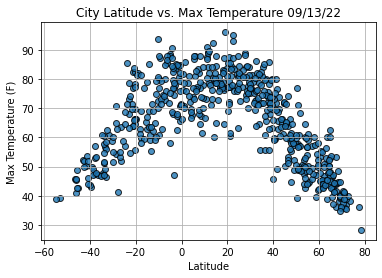

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

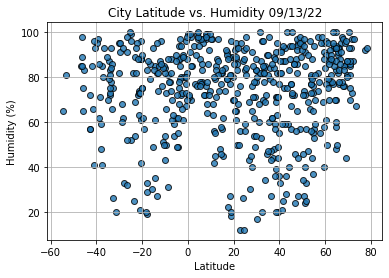

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

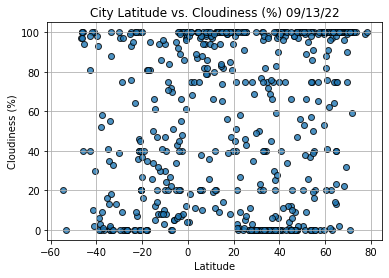

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

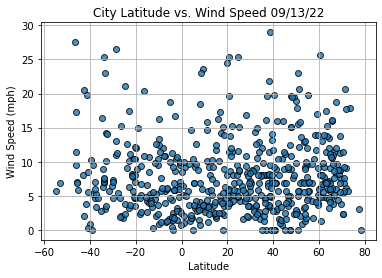

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()